In [34]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [35]:
# Membaca dataset dan mengubah format tanggal
df = pd.read_csv('Book2.csv', delimiter=';')
df['Tanggal Pembelian'] = pd.to_datetime(df['Tanggal Pembelian'], dayfirst=True, format='mixed')

# Mengonversi tanggal menjadi nilai numerik yang dapat digunakan dalam model
df['Tanggal Numerik'] = df['Tanggal Pembelian'].apply(lambda x: x.toordinal())

In [37]:
print(df['Tanggal Pembelian'])

0    2022-01-01
1    2022-05-01
2    2022-08-01
3    2022-12-01
4    2022-01-15
        ...    
94   2022-10-21
95   2022-10-24
96   2022-10-27
97   2022-10-30
98   2022-10-30
Name: Tanggal Pembelian, Length: 99, dtype: datetime64[ns]


In [36]:
print(df['Tanggal Numerik'])

0     738156
1     738276
2     738368
3     738490
4     738170
       ...  
94    738449
95    738452
96    738455
97    738458
98    738458
Name: Tanggal Numerik, Length: 99, dtype: int64


In [ ]:
# Membangun model dengan TensorFlow
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Mengubah kolom inventaris menjadi array target
target = df['Inventaris'].values

# Mengubah kolom tanggal menjadi array fitur
features = df['Tanggal Numerik'].values.reshape((-1, 1))

In [38]:
print(target)

[3 1 2 1 4 2 2 1 3 2 1 1 2 3 1 2 1 2 1 3 2 1 1 2 3 1 2 1 2 1 4 2 2 1 3 2 1
 1 2 3 1 2 1 2 1 3 2 1 1 2 3 1 2 1 2 1 4 2 2 1 3 2 1 1 2 3 1 2 1 2 1 3 2 1
 1 2 3 1 2 1 2 1 4 2 2 1 3 2 1 1 2 3 1 2 1 2 1 3 4]


In [39]:
print(features)

[[738156]
 [738276]
 [738368]
 [738490]
 [738170]
 [738173]
 [738176]
 [738180]
 [738183]
 [738186]
 [738188]
 [738277]
 [738369]
 [738491]
 [738201]
 [738204]
 [738207]
 [738211]
 [738214]
 [738158]
 [738248]
 [738339]
 [738431]
 [738227]
 [738230]
 [738233]
 [738236]
 [738239]
 [738242]
 [738245]
 [738218]
 [738310]
 [738402]
 [738493]
 [738260]
 [738263]
 [738160]
 [738250]
 [738341]
 [738433]
 [738288]
 [738291]
 [738294]
 [738297]
 [738300]
 [738303]
 [738306]
 [738220]
 [738312]
 [738404]
 [738495]
 [738321]
 [738324]
 [738327]
 [738330]
 [738333]
 [738336]
 [738221]
 [738313]
 [738405]
 [738496]
 [738351]
 [738354]
 [738357]
 [738360]
 [738363]
 [738366]
 [738194]
 [738283]
 [738375]
 [738467]
 [738381]
 [738384]
 [738387]
 [738390]
 [738393]
 [738396]
 [738164]
 [738254]
 [738345]
 [738437]
 [738411]
 [738414]
 [738417]
 [738420]
 [738423]
 [738426]
 [738428]
 [738224]
 [738316]
 [738408]
 [738499]
 [738443]
 [738446]
 [738449]
 [738452]
 [738455]
 [738458]
 [738458]]


In [ ]:
# Melatih model
history=model.fit(features, target, epochs=100, batch_size=32)

In [25]:
# Fungsi untuk mendapatkan rekomendasi item dan jumlahnya berdasarkan tanggal
def get_recommendation(date):
    date_ordinal = datetime.strptime(date, '%d/%m/%Y').toordinal()
    prediction = model.predict([[date_ordinal]])
    return round(prediction[0][0])

# Fungsi untuk mendapatkan item yang harus dibeli berdasarkan tanggal
def get_item_recommendation(date):
    date_str = datetime.strptime(date, '%d/%m/%Y').strftime('%Y-%m-%d')
    filtered_df = df[df['Tanggal Pembelian'] <= date_str]
    latest_item = filtered_df.iloc[-1]['Item Pembelian']
    return latest_item


Epoch 1/100
4/4 [==============================] - 2s 5ms/step - loss: 60444553216.0000
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 35683471360.0000
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 19238281216.0000
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 8629855232.0000
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 2911257344.0000
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 559005312.0000
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 17635650.0000
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 253669376.0000
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 599380288.0000
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 737873408.0000
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 637632704.0000
Epoch 12/100
4/4 [===========================

4/4 [==============================] - 0s 4ms/step - loss: 0.7538
Loss: 0.7538254857063293


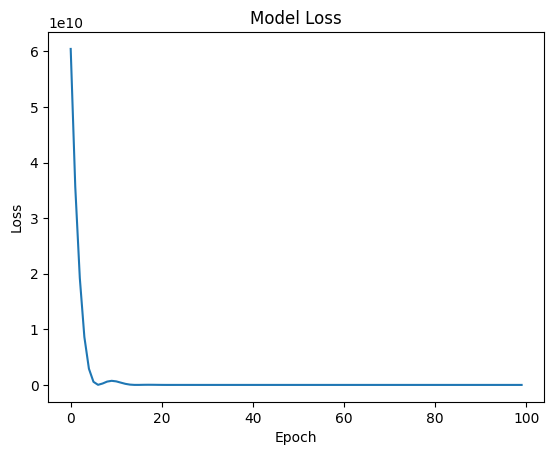

In [26]:
# Evaluasi model
loss = model.evaluate(features, target)
print(f"Loss: {loss}")

# Plot loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [42]:
# input user
tanggal_rekomendasi = '01/01/2022'
jumlah_rekomendasi = get_recommendation(tanggal_rekomendasi)
item_rekomendasi = get_item_recommendation(tanggal_rekomendasi)

print(f"Pada tanggal {tanggal_rekomendasi}, disarankan untuk membeli: {item_rekomendasi}.")

1/1 [==============================] - 0s 93ms/step
Pada tanggal 01/01/2022, disarankan untuk membeli: telur.


In [45]:
# Mendapatkan rekomendasi top 5
df['Rekomendasi'] = df['Tanggal Numerik'].apply(lambda x: round(model.predict([[x]])[0][0]))
top_5_rekomendasi = df.sort_values('Rekomendasi', ascending=False).head(5)[['Item Pembelian']]

1/1 [==============================] - 0s 83ms/step


In [46]:
print("Rekomendasi Top 5:")
print(top_5_rekomendasi)

Rekomendasi Top 5:
   Item Pembelian
0           telur
74           cabe
72         rempah
71          beras
70            oil
